Objective 

Q1. What is the overall sales trend? 

Q2. Which are the Top 10 products by sales?

Q3. Which are the Most Selling Products?

Q4. Which is the most preferred Ship Mode?

Q5. Which are the Most Profitable Category and Sub-Category?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

df = pd.read_excel('./superstore_sales.xlsx')

Data Auditing

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [7]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [11]:
df.shape

(51290, 21)

In [14]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [15]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


Exploratory Data Analysis

<Axes: xlabel='product_name', ylabel='sales'>

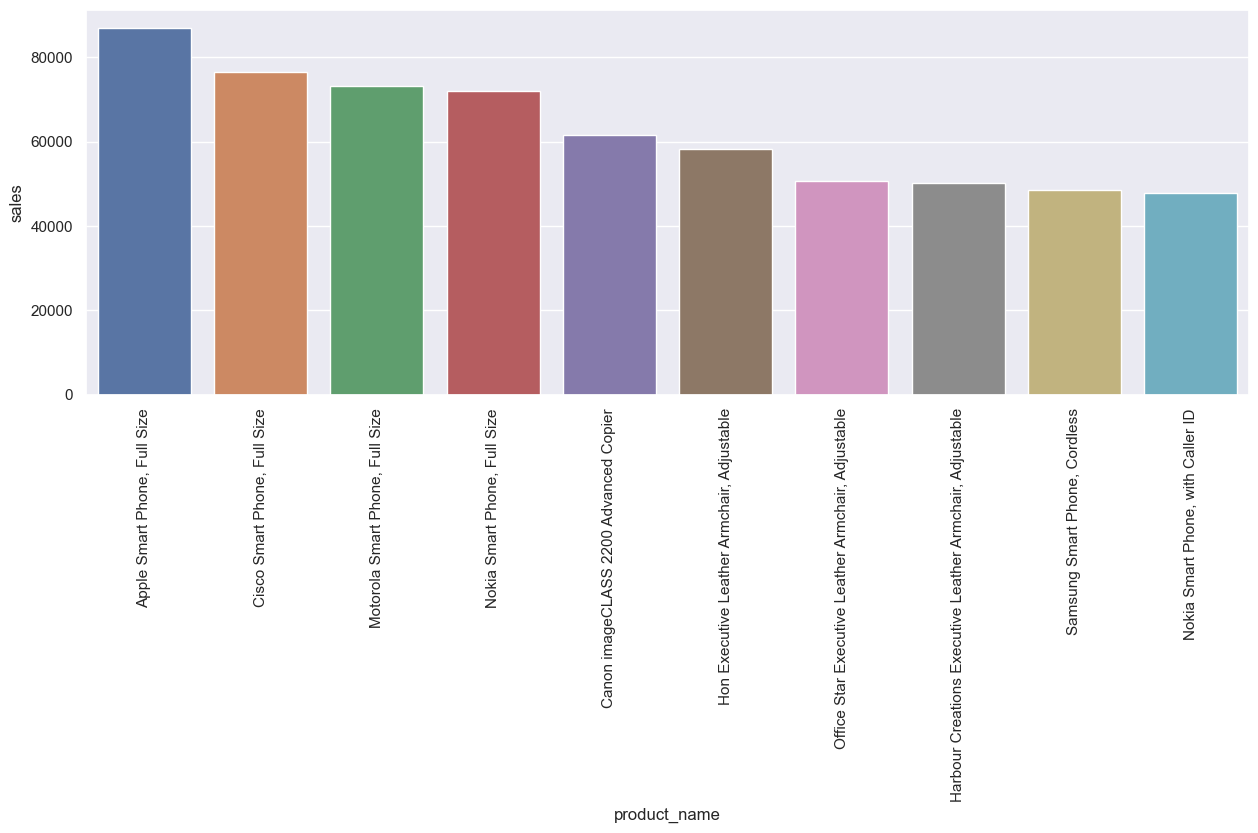

In [43]:
#Q1. Which are the top 10 products by sale?
products_sale = df.groupby(['product_name'], as_index=False )['sales'].sum().sort_values(by='sales', ascending = False).head(10)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=products_sale, x="product_name", y="sales")

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [44]:
products_sale[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


In [46]:
#Q2. Which are the most selling products?
products_quantity_sale = df.groupby(['product_name'], as_index=False )['quantity'].sum().sort_values(by='quantity', ascending = False).head(10)
products_quantity_sale[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


In [51]:
#Q3. Which is the most preffered mode of shipment?
prefered_shipment = df.groupby(['ship_mode']).size().sort_values(ascending = False)
prefered_shipment

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
dtype: int64

Standard Class is the most Preferred Ship Mode.

In [12]:
#Q4. Which are the most Profitable Category and Sub-Category?
Profitable_Cat_Sub = pd.DataFrame(df.groupby(['category', 'sub_category'])['profit'].sum(['profit']))
Profitable_Cat_Sub.sort_values(['category','profit'], ascending = False)

C:\Users\nisal\AppData\Local\Temp\ipykernel_10828\2012171611.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Profitable_Cat_Sub = pd.DataFrame(df.groupby(['category', 'sub_category'])['profit'].sum(['profit']).sort_values(['category','profit'], ascending = False))


TypeError: unhashable type: 'list'